<a href="https://colab.research.google.com/github/Asigen93/JST2_Tugas2/blob/main/TUGAS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [2]:
def create_model(activation_function):
  model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation=activation_function, input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation=activation_function),
    layers.Flatten(),
    layers.Dense(64, activation=activation_function),
    layers.Dense(10, activation='softmax')  # Softmax for output layer
  ])

  model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model

# List of activation functions to compare
activation_functions = ['linear', 'sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}

In [3]:
# Train and evaluate models with different activation functions
for activation in activation_functions:
    print(f"\nTraining model with activation: {activation}...")
    if activation == 'leaky_relu':
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3)),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Flatten(),
            layers.Dense(64),
            layers.Activation(tf.keras.layers.LeakyReLU(alpha=0.1)),
            layers.Dense(10, activation='softmax')
        ])
    else:
        model = create_model(activation)

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2, verbose=2)
    test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)


Training model with activation: linear...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 - 41s - 66ms/step - accuracy: 0.4622 - loss: 1.5282 - val_accuracy: 0.5499 - val_loss: 1.3047
Epoch 2/10
625/625 - 34s - 55ms/step - accuracy: 0.5695 - loss: 1.2384 - val_accuracy: 0.5823 - val_loss: 1.2137
Epoch 3/10
625/625 - 40s - 65ms/step - accuracy: 0.6057 - loss: 1.1456 - val_accuracy: 0.6011 - val_loss: 1.1632
Epoch 4/10
625/625 - 42s - 67ms/step - accuracy: 0.6277 - loss: 1.0851 - val_accuracy: 0.6141 - val_loss: 1.1366
Epoch 5/10
625/625 - 40s - 65ms/step - accuracy: 0.6454 - loss: 1.0359 - val_accuracy: 0.6238 - val_loss: 1.1203
Epoch 6/10
625/625 - 31s - 50ms/step - accuracy: 0.6584 - loss: 0.9939 - val_accuracy: 0.6280 - val_loss: 1.1085
Epoch 7/10
625/625 - 42s - 67ms/step - accuracy: 0.6719 - loss: 0.9575 - val_accuracy: 0.6284 - val_loss: 1.1051
Epoch 8/10
625/625 - 40s - 63ms/step - accuracy: 0.6837 - loss: 0.9244 - val_accuracy: 0.6256 - val_loss: 1.1125
Epoch 9/10
625/625 - 42s - 67ms/step - accuracy: 0.6950 - loss: 0.8949 - val_accuracy: 0.6244 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/10
625/625 - 35s - 55ms/step - accuracy: 0.4344 - loss: 1.5562 - val_accuracy: 0.5431 - val_loss: 1.2799
Epoch 2/10
625/625 - 42s - 68ms/step - accuracy: 0.5826 - loss: 1.1833 - val_accuracy: 0.6200 - val_loss: 1.0851
Epoch 3/10
625/625 - 43s - 68ms/step - accuracy: 0.6440 - loss: 1.0075 - val_accuracy: 0.6554 - val_loss: 0.9953
Epoch 4/10
625/625 - 43s - 69ms/step - accuracy: 0.6863 - loss: 0.8924 - val_accuracy: 0.6837 - val_loss: 0.9210
Epoch 5/10
625/625 - 39s - 63ms/step - accuracy: 0.7178 - loss: 0.8043 - val_accuracy: 0.6903 - val_loss: 0.9107
Epoch 6/10
625/625 - 41s - 66ms/step - accuracy: 0.7427 - loss: 0.7369 - val_accuracy: 0.6964 - val_loss: 0.8905
Epoch 7/10
625/625 - 37s - 59ms/step - accuracy: 0.7661 - loss: 0.6743 - val_accuracy: 0.6961 - val_loss: 0.9037
Epoch 8/10
625/625 - 42s - 67ms/step - accuracy: 0.7837 - loss: 0.6213 - val_accuracy: 0.6954 - val_loss: 0.9317
Epoch 9/10
625/625 - 32s - 52ms/step - accuracy: 0.7996 - loss: 0.5744 - val_accuracy: 0.6889 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


Text(0.5, 1.0, 'Training Accuracy for Different Activation Functions on CIFAR-10')

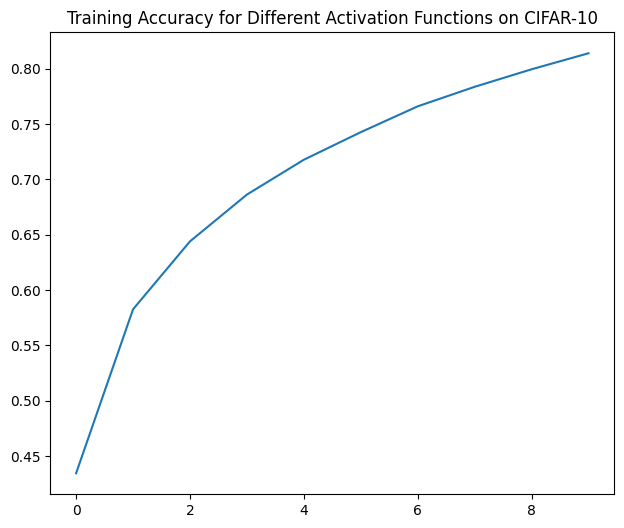

In [4]:
# Simpan history, loss, accuracy, dan confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_labels, axis=1)
conf_matrix = confusion_matrix(y_true, y_pred_classes)
results[activation] = (history, test_loss, test_acc, conf_matrix)

# Plot hasil untuk accuracy dan loss
plt.figure(figsize=(16, 6))

# Plot akurasi pelatihan
plt.subplot(1, 2, 1)
for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['accuracy'], label=f'{activation} (train)')
plt.title('Training Accuracy for Different Activation Functions on CIFAR-10')

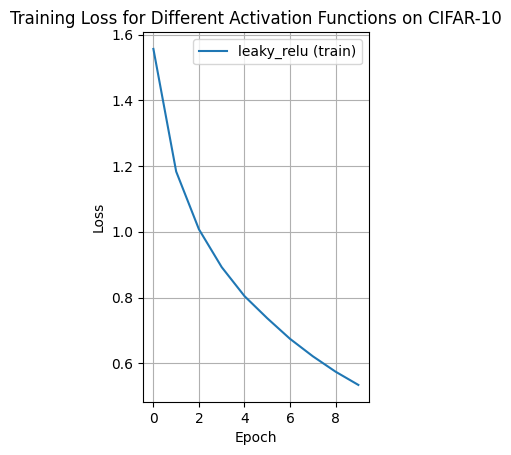


Test accuracy with leaky_relu: 1.0220
Error: Confusion matrix for leaky_relu is not a 2D numpy array.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot training loss
plt.subplot(1, 2, 2)
for activation, (history, _, _, _) in results.items():
    plt.plot(history.history['loss'], label=f'{activation} (train)')
plt.title('Training Loss for Different Activation Functions on CIFAR-10')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Display confusion matrix for each activation function
for activation, (_, test_acc, conf_matrix, _) in results.items():
    print(f'\nTest accuracy with {activation}: {test_acc:.4f}')

    # Check if conf_matrix is 2D and has the correct shape
    if isinstance(conf_matrix, np.ndarray) and conf_matrix.ndim == 2:
        if conf_matrix.shape == (10, 10):
            plt.figure(figsize=(8, 6))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                        xticklabels=[f'Class {i}' for i in range(10)],
                        yticklabels=[f'Class {i}' for i in range(10)])
            plt.title(f'Confusion Matrix for {activation.capitalize()} Activation on CIFAR-10')
            plt.xlabel('Predicted Labels')
            plt.ylabel('True Labels')
            plt.show()
        else:
            print(f"Error: Confusion matrix for {activation} does not have the shape (10, 10). It has shape {conf_matrix.shape}.")
    else:
        print(f"Error: Confusion matrix for {activation} is not a 2D numpy array.")
